In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle 

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,clean,processed
0,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,who was is the best president of the past year...,well president past retweet
3,i don t have to guess your religion christmasa...,guess religion christmasaftermath
4,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


In [4]:
proc_tweets = df.processed

In [5]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

In [6]:
dtm_tf = vectorizer.fit_transform(proc_tweets)
print(dtm_tf.shape)

(203482, 77822)


In [10]:
%%time

lda_model = LatentDirichletAllocation(n_components=6, random_state=42)
lda_model.fit(dtm_tf)

lda_doc_matrix = lda_model.transform(dtm_tf)

CPU times: user 5min 52s, sys: 814 ms, total: 5min 53s
Wall time: 5min 53s


In [11]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [13]:
terms = vectorizer.get_feature_names()

display_topics(lda_model, terms, 25)


Topic  0
trump, news, post, new, merkel, die, debate, muss, video, politic, watch, clinton, election, anti, ist, tonight, photo, presidential, court, live, protest, rally, youtube, hat, betteralternativetodebates

Topic  1
obama, tcot, pjnet, ccot, trump, gop, god, wakeupamerica, election, away, day, america, plan, need, president, teaparty, sign, world, house, leave, office, obamacare, people, todolistbeforechristmas, come

Topic  2
like, people, love, play, make, thing, know, time, day, life, twitter, look, tweet, think, game, need, thank, come, want, say, use, feel, world, let, work

Topic  3
trump, donald, hillary, clinton, real, say, president, america, maga, people, obama, politic, make, want, country, like, voter, white, american, time, medium, support, poll, americans, supporter

Topic  4
good, man, midnight, woman, kill, black, police, stop, say, shoot, new, islam, old, cruz, people, family, make, attack, girl, muslim, ted, child, death, school, want

Topic  5
clinton, hillar

In [14]:
topic_cols = ['news', 'conservative', 'general_twitter', 'trump', 'violence', 'clinton']

In [15]:
lda_doc_matrix

array([[0.01668614, 0.01671921, 0.01676255, 0.01687818, 0.9162238 ,
        0.01673013],
       [0.02784275, 0.02785185, 0.02807543, 0.85996697, 0.02811381,
        0.0281492 ],
       [0.041671  , 0.04187765, 0.04231849, 0.79062642, 0.04172208,
        0.04178435],
       ...,
       [0.02383652, 0.02384963, 0.88057349, 0.02393875, 0.02385778,
        0.02394382],
       [0.02397061, 0.02426326, 0.02429331, 0.02403896, 0.54554694,
        0.35788692],
       [0.01862333, 0.01883651, 0.90652258, 0.01880578, 0.01866339,
        0.01854841]])

In [16]:
lda_df= pd.DataFrame(lda_doc_matrix, columns=topic_cols)

In [17]:
lda_df['label'] = lda_df.idxmax(axis=1)

In [18]:
text = pd.read_csv('../data_files/tweets.csv.zip')
text.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN
3,2.584153e+09,queenofthewo,1.482765e+12,2016-12-26 15:06:41,NaN,NaN,NaN,RT @jww372: I don't have to guess your religio...,8.134006e+17,NaN,"[""ChristmasAftermath""]",[],POSTED,[],NaN,NaN
4,1.768260e+09,mrclydepratt,1.501987e+12,2017-08-06 02:36:24,NaN,NaN,NaN,RT @Shareblue: Pence and his lawyers decided w...,8.940243e+17,NaN,[],[],POSTED,[],NaN,NaN


In [36]:
lda_df['handle'] = text['user_key']
lda_df['datetime'] = text['created_str']
lda_df['tweet'] = text['text']

In [37]:
lda_df.head()

,news,conservative,general_twitter,trump,violence,clinton,label,handle,datetime_str,tweet,datetime
0,0.016686,0.016719,0.016763,0.016878,0.916224,0.016730,violence,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...,2016-03-22 18:31:42
1,0.027843,0.027852,0.028075,0.859967,0.028114,0.028149,trump,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",2016-10-10 20:57:00
2,0.041671,0.041878,0.042318,0.790626,0.041722,0.041784,trump,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...,2017-02-22 12:43:43
3,0.041698,0.041748,0.042370,0.041795,0.789994,0.042395,violence,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...,2016-12-26 15:06:41
4,0.024031,0.023984,0.023932,0.279995,0.023941,0.624117,clinton,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...,2017-08-06 02:36:24


In [38]:
dt_df = lda_df[['handle', 'datetime', 'tweet', 'label', 
               'trump', 'clinton', 'conservative', 'violence', 'news', 'general_twitter']] 

In [39]:
dt_df

,handle,datetime,tweet,label,trump,clinton,conservative,violence,news,general_twitter
0,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...,violence,0.016878,0.016730,0.016719,0.916224,0.016686,0.016763
1,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",trump,0.859967,0.028149,0.027852,0.028114,0.027843,0.028075
2,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...,trump,0.790626,0.041784,0.041878,0.041722,0.041671,0.042318
3,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...,violence,0.041795,0.042395,0.041748,0.789994,0.041698,0.042370
4,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...,clinton,0.279995,0.624117,0.023984,0.023941,0.024031,0.023932
...,...,...,...,...,...,...,...,...,...,...
203477,nojonathonno,2016-11-01 12:13:06,"RT @AndreaChalupa: In intel circles, the story...",clinton,0.012089,0.940005,0.011954,0.012005,0.011966,0.011982
203478,judelambertusa,2015-06-18 01:04:35,RT @KansasCityDNews: Tonganoxie police: Middle...,violence,0.016794,0.016785,0.016877,0.916045,0.016775,0.016724
203479,patriotblake,2017-01-10 18:50:48,RT @signsinyork: Getting the right #company lo...,general_twitter,0.023939,0.023944,0.023850,0.023858,0.023837,0.880573
203480,dailysandiego,2016-11-20 21:49:07,The Latest: Obama affirms continuity of ties w...,violence,0.024039,0.357887,0.024263,0.545547,0.023971,0.024293


In [40]:
print(f'Number of unique accounts: {len(dt_df.handle.unique())}')

Number of unique accounts: 454


In [42]:
dt_df['datetime'] = pd.to_datetime(dt_df['datetime'])

<ipython-input-42-d9d909e52f09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df['datetime'] = pd.to_datetime(dt_df['datetime'])


In [46]:
dt_df['month'] = dt_df['datetime'].dt.strftime('%Y-%m')

In [48]:
dt_df.head()

,handle,datetime,tweet,label,trump,clinton,conservative,violence,news,general_twitter,month
0,ryanmaxwell_1,2016-03-22 18:31:42,#IslamKills Are you trying to say that there w...,violence,0.016878,0.016730,0.016719,0.916224,0.016686,0.016763,2016-03
1,detroitdailynew,2016-10-10 20:57:00,"Clinton: Trump should’ve apologized more, atta...",trump,0.859967,0.028149,0.027852,0.028114,0.027843,0.028075,2016-10
2,cookncooks,2017-02-22 12:43:43,RT @ltapoll: Who was/is the best president of ...,trump,0.790626,0.041784,0.041878,0.041722,0.041671,0.042318,2017-02
3,queenofthewo,2016-12-26 15:06:41,RT @jww372: I don't have to guess your religio...,violence,0.041795,0.042395,0.041748,0.789994,0.041698,0.042370,2016-12
4,mrclydepratt,2017-08-06 02:36:24,RT @Shareblue: Pence and his lawyers decided w...,clinton,0.279995,0.624117,0.023984,0.023941,0.024031,0.023932,2017-08


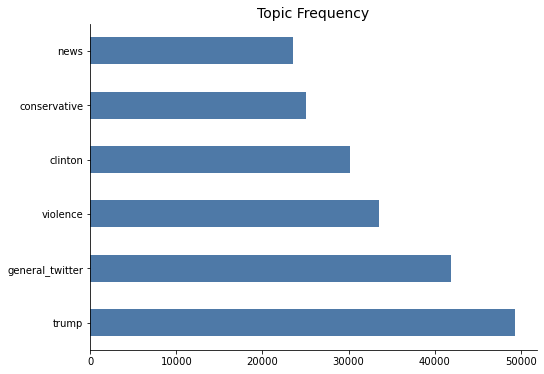

In [80]:
plt.figure(figsize=(8, 6))
dt_df['label'].value_counts(ascending=False).plot(kind='barh', color='#4e79a7')
plt.title('Topic Frequency', fontsize=14)
sns.despine();

In [109]:
date_freq = dt_df.groupby(['month', 'label']).size().unstack().reset_index()

In [112]:
date_freq.fillna(0, inplace=True)
date_freq['total'] = date_freq.sum(axis=1)

In [113]:
date_freq.head()

label,month,clinton,conservative,general_twitter,news,trump,violence,total
0,2014-07,0.0,2.0,8.0,0.0,0.0,2.0,12.0
1,2014-08,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2014-09,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2014-11,23.0,53.0,185.0,29.0,40.0,58.0,388.0
4,2014-12,20.0,55.0,231.0,40.0,40.0,56.0,442.0


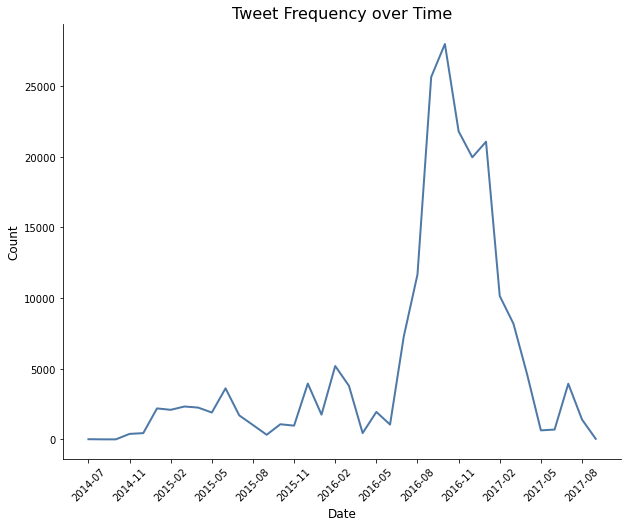

In [142]:
dates = date_freq.month
total_tweets = date_freq.total
x_ticks = list(date_freq.month.unique()[::3])

plt.figure(figsize=(10, 8))
plt.plot(dates, total_tweets, color='#4e79a7', linewidth=2)
plt.title('Tweet Frequency over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_ticks, rotation=45)
sns.despine();

In [151]:
x_ticks

['2014-07',
 '2014-11',
 '2015-02',
 '2015-05',
 '2015-08',
 '2015-11',
 '2016-02',
 '2016-05',
 '2016-08',
 '2016-11',
 '2017-02',
 '2017-05',
 '2017-08']

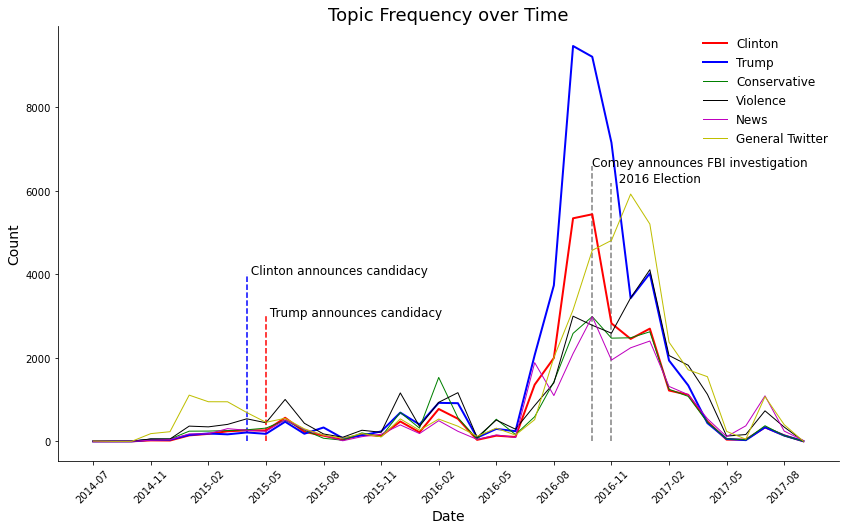

In [186]:
dates = date_freq.month
x_ticks = list(date_freq.month.unique()[::3])

clinton = date_freq.clinton
conservative = date_freq.conservative
gen_twitter = date_freq.general_twitter
news = date_freq.news
trump = date_freq.trump
violence = date_freq.violence

plt.figure(figsize=(14, 8))
plt.plot(dates, clinton, color='r', linewidth=2, label='Clinton')
plt.plot(dates, trump, color='b', linewidth=2, label='Trump')
plt.plot(dates, conservative, color='g', linewidth=1, label='Conservative')
plt.plot(dates, violence, color='0', linewidth=1, label='Violence')
plt.plot(dates, news, color='m', linewidth=1, label='News')
plt.plot(dates, gen_twitter, color='y', linewidth=1, label='General Twitter')

plt.vlines('2015-04', ymin=0, ymax=4000, linestyle='--', color='b')
plt.text('2015-04', 4000, ' Clinton announces candidacy', rotation=0, fontsize=12)

plt.vlines('2015-05', ymin=0, ymax=3000, linestyle='--', color='r')
plt.text('2015-05', 3000, ' Trump announces candidacy', rotation=0, fontsize=12)

plt.vlines('2016-10', ymin=0, ymax=6600, linestyle='--', color='grey')
plt.text('2016-10', 6600, 'Comey announces FBI investigation', rotation=0, fontsize=12)

plt.vlines('2016-11', ymin=0, ymax=6200, linestyle='--', color='grey')
plt.text('2016-11', 6200, '  2016 Election', rotation=0, fontsize=12)


plt.title('Topic Frequency over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='best', frameon=False, fontsize=12)
sns.despine();